## Summary
In this project, we will analyze local and global temperature data and compare the temperature trends.

## Data Extraction
Used Python for data exploration/analysis and SQL to extract data from the database:

`select * from city_data;
 select * from city_list;
 select * from global_data;`

## Exploratory Data Analysis

### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Importing dataset

In [2]:
city_data = pd.read_csv("city_data.csv")
city_list = pd.read_csv("city_list.csv")
global_data = pd.read_csv("global_data.csv")

In [3]:
city_data.head() ## head = top 5 rows

,year,city,country,avg_temp
0,1849,Abidjan,Côte D'Ivoire,25.58
1,1850,Abidjan,Côte D'Ivoire,25.52
2,1851,Abidjan,Côte D'Ivoire,25.67
3,1852,Abidjan,Côte D'Ivoire,NaN
4,1853,Abidjan,Côte D'Ivoire,NaN


In [4]:
city_list.head()

,city,country
0,Abidjan,Côte D'Ivoire
1,Abu Dhabi,United Arab Emirates
2,Abuja,Nigeria
3,Accra,Ghana
4,Adana,Turkey


In [5]:
global_data.head()

,year,avg_temp
0,1750,8.72
1,1751,7.98
2,1752,5.78
3,1753,8.39
4,1754,8.47


### Checking for null

In [6]:
city_data.isnull().sum()

year           0
city           0
country        0
avg_temp    2547
dtype: int64

2547 null values in the avg_temp column.

In [7]:
city_list.isnull().sum()

city       0
country    0
dtype: int64

In [8]:
global_data.isnull().sum()

year        0
avg_temp    0
dtype: int64

No null values in the city_list and global_data.

In [9]:
## calculate the mininmal values of the "year" and "avg_temp" column in the global_data dataframe
print(global_data["year"].min())
print(global_data["avg_temp"].min())

1750
5.78


In [10]:
## calculate the maximal values of the "year" and "avg_temp" column in the global_data dataframe
print(global_data["year"].max())
print(global_data["avg_temp"].max())

2015
9.83


**The maximum year is 2015, while the minimum year is 1750, which means that there is data for 265 years in "global_data", and there is no missing values in the dataframe.**

#### Extracting `Bangalore` city data from the `city_data`  

In [11]:
bangalore_data = city_data[city_data.city == "Bangalore"]

In [12]:
bangalore_data.head()

,year,city,country,avg_temp
6367,1796,Bangalore,India,24.49
6368,1797,Bangalore,India,25.18
6369,1798,Bangalore,India,24.65
6370,1799,Bangalore,India,24.81
6371,1800,Bangalore,India,24.85


In [13]:
## calculate missing values in the bangalore_data
bangalore_data.isna().sum()

year        0
city        0
country     0
avg_temp    7
dtype: int64

**7 missing values in the `avg_temp` column.**

In [14]:
## fill missing values with median
bangalore_data.fillna(bangalore_data.median(), inplace = True)

In [15]:
bangalore_data.isna().sum()

year        0
city        0
country     0
avg_temp    0
dtype: int64

No missing values now.

In [16]:
## check for max and min year in the bangalore_data and global_data
print("Bangalore :")
print(bangalore_data["year"].max())
print(bangalore_data["year"].min())
print(bangalore_data["avg_temp"].max())
print(bangalore_data["avg_temp"].min())
print()
print("Global :")
print(global_data["year"].max())
print(global_data["year"].min())
print(global_data["avg_temp"].max())
print(global_data["avg_temp"].min())

Bangalore :
2013
1796
26.61
23.3

Global :
2015
1750
9.83
5.78


**In the global_data, we have data from 1750 to 2015 but for Bangalore we have data from 1796 to 2013. So in order to compare the data better we have to be sure that dataframes are of same size (1796-2013). In addition the rolling mean will be calculated with a window of 10 years. This should lead to a better readable plot without losing too much information**

In [17]:
df_global_data = global_data[(global_data["year"] < 2014) & (global_data["year"] >= 1796)].copy()

In [18]:
print(df_global_data["year"].max())
print(df_global_data["year"].min())

2013
1796


In [19]:
#check if both dataframe have the same length
len(df_global_data) == len(bangalore_data)

True

#### Moving Average

In [20]:
#setting the window for the rolling mean
avg_num = 10

#calculate the rolling mean 
df_bangalore_data = bangalore_data.copy()
df_bangalore_data["moving_avg"] = bangalore_data["avg_temp"].rolling(window = 10).mean()

#reset the index of the bangalore dataframe
#bangalore_data.reset_index(inplace = True, drop = True)

#calculate the rolling mean for the global_data dataframe
df_global_data["moving_avg"] = df_global_data["avg_temp"].rolling(window = 10).mean()
df_global_data.reset_index(inplace = True, drop = True)

In [21]:
df_bangalore_data[10:15]

,year,city,country,avg_temp,moving_avg
6377,1806,Bangalore,India,24.87,25.019
6378,1807,Bangalore,India,24.25,24.926
6379,1808,Bangalore,India,24.88,24.949
6380,1809,Bangalore,India,24.88,24.956
6381,1810,Bangalore,India,24.88,24.959


In [22]:
df_global_data[10:15]

,year,avg_temp,moving_avg
10,1806,8.43,8.567
11,1807,8.28,8.544
12,1808,7.63,8.440
13,1809,7.08,8.297
14,1810,6.92,8.141


### Visualization

**1. Average temperature trend : Bangalore**

Text(0, 0.5, 'Temperature °C')

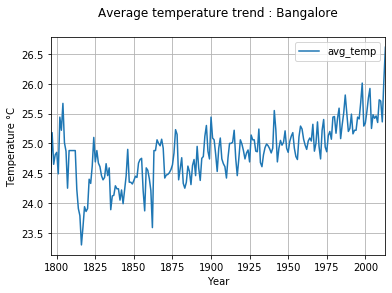

In [23]:
bangalore_data.plot("year", "avg_temp", grid = True)
plt.title("Average temperature trend : Bangalore\n")
plt.xlabel("Year")
plt.ylabel("Temperature °C")

#### 2. Average temperature trend: Global 

Text(0, 0.5, 'Temperature °C')

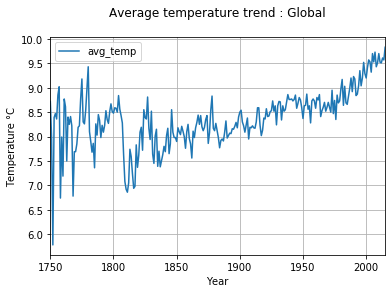

In [24]:
global_data.plot("year", "avg_temp", grid = True)
plt.title("Average temperature trend : Global\n")
plt.xlabel("Year")
plt.ylabel("Temperature °C")

#### 3. Average temperature trend: Global Vs Bangalore

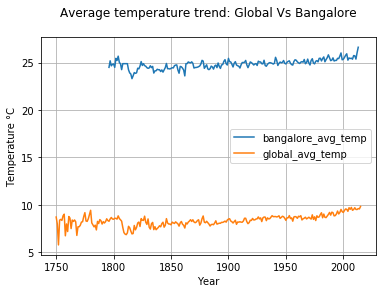

In [25]:
plt.plot("year", "avg_temp", data = bangalore_data, label = "bangalore_avg_temp")
plt.plot("year", "avg_temp", data = global_data, label = "global_avg_temp")
plt.title("Average temperature trend: Global Vs Bangalore\n")
plt.xlabel("Year")
plt.ylabel("Temperature °C")
plt.grid()
plt.legend()
plt.show()

#### 4. Moving average temperature trend (10 years) : Global Vs Bangalore 

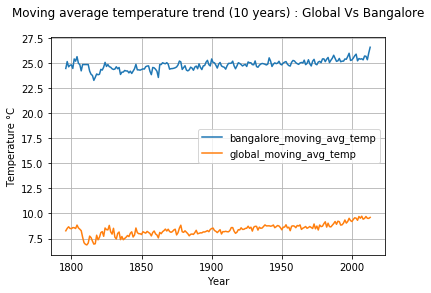

In [26]:
plt.plot("year", "avg_temp", data = df_bangalore_data, label = "bangalore_moving_avg_temp")
plt.plot("year", "avg_temp", data = df_global_data, label = "global_moving_avg_temp")
plt.title("Moving average temperature trend (10 years) : Global Vs Bangalore\n")
plt.xlabel("Year")
plt.ylabel("Temperature °C")
plt.grid()
plt.legend()
plt.show()

### Conclusion

* We can see that Bangalore avg_temperature is higher than the global avg_temperature.
* We can clearly see that the earth is getting warmer.
* Maximum and minimum temperature for Bangalore is 26.61 and 23.3  whereas for global temperature it's 9.83 and 5.78.